# Evaluation of MSSW on SEA

## Imports

In [15]:
import numpy as np
import pandas as pd
import sklearn

## SEA dataset locations

In [16]:
abrupt_sea_path = '../Datasets_concept_drift/synthetic_data/abrupt_drift/sea_1_abrupt_drift_0_noise_balanced.arff'
gradual_sea_paths = [
    '../Datasets_concept_drift/synthetic_data/gradual_drift/sea_1_gradual_drift_0_noise_balanced_05.arff',
    '../Datasets_concept_drift/synthetic_data/gradual_drift/sea_1_gradual_drift_0_noise_balanced_1.arff',
    '../Datasets_concept_drift/synthetic_data/gradual_drift/sea_1_gradual_drift_0_noise_balanced_5.arff',
    '../Datasets_concept_drift/synthetic_data/gradual_drift/sea_1_gradual_drift_0_noise_balanced_10.arff',
    '../Datasets_concept_drift/synthetic_data/gradual_drift/sea_1_gradual_drift_0_noise_balanced_20.arff'
]
all_sea_data_paths = [abrupt_sea_path] + gradual_sea_paths

## Accept and preprocess SEA datasets

In [17]:
from eval_helpers import accepting
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


sea_reference_batches = {}
sea_reference_label_batches = {}
sea_testing_batches = {}
sea_testing_label_batches = {}
for sea_path in all_sea_data_paths:
    df_x, df_y = accepting.get_clean_df(sea_path)
    df_y = pd.DataFrame(LabelEncoder().fit_transform(df_y))

    df_x_ref, df_x_test, df_y_ref, df_y_test = sklearn.model_selection.train_test_split(
        df_x, df_y, test_size=0.7, shuffle=False)

    reference_labels = df_y_ref.to_numpy()
    testing_labels = df_y_test.to_numpy()

    print('shape reference labels')
    print(reference_labels.shape)
    print('shape testing labels')
    print(testing_labels.shape)
    
    reference_data = df_x_ref.to_numpy()
    testing_data = df_x_test.to_numpy()
    scaler = MinMaxScaler()
    scaler.fit(reference_data)
    reference_data = scaler.transform(reference_data)
    testing_data = scaler.transform(testing_data)
    
    num_ref_batches = 3
    num_test_batches = 7
    ref_batches = np.array_split(reference_data, num_ref_batches)
    ref_label_batches = np.array_split(reference_labels, num_ref_batches)
    test_batches = np.array_split(testing_data, num_test_batches)
    test_label_batches = np.array_split(testing_labels, num_test_batches)
    
    sea_reference_batches[sea_path] = ref_batches
    sea_reference_label_batches[sea_path] = ref_label_batches
    sea_testing_batches[sea_path] = test_batches
    sea_testing_label_batches[sea_path] = test_label_batches

C:\Users\jpohl\PycharmProjects\clustering-drift-detection\ucdd_improved\eval_helpers\accepting.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.decode('utf-8')
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


shape reference labels
(30000, 1)
shape testing labels
(70000, 1)


C:\Users\jpohl\PycharmProjects\clustering-drift-detection\ucdd_improved\eval_helpers\accepting.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.decode('utf-8')
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


shape reference labels
(30000, 1)
shape testing labels
(70000, 1)


C:\Users\jpohl\PycharmProjects\clustering-drift-detection\ucdd_improved\eval_helpers\accepting.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.decode('utf-8')
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


shape reference labels
(30000, 1)
shape testing labels
(70000, 1)


C:\Users\jpohl\PycharmProjects\clustering-drift-detection\ucdd_improved\eval_helpers\accepting.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.decode('utf-8')
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


shape reference labels
(30000, 1)
shape testing labels
(70000, 1)


C:\Users\jpohl\PycharmProjects\clustering-drift-detection\ucdd_improved\eval_helpers\accepting.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.decode('utf-8')
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


shape reference labels
(30000, 1)
shape testing labels
(70000, 1)
shape reference labels
(30000, 1)
shape testing labels
(70000, 1)


C:\Users\jpohl\PycharmProjects\clustering-drift-detection\ucdd_improved\eval_helpers\accepting.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.decode('utf-8')
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Find the best tol and max_iter in SEA (the drift type is irrelevant)

In [20]:
from eval_helpers import kmeans_verbose_helpers


def write_kmeans_results_ucdd_helper(output_filename_no_extension, ref_batches, n_init, max_iter, tol, random_state):
    # dummy = [np.asarray(1), np.asarray(2), np.asarray(3)]
    combinations = []
    for i in range(3):
    #     combinations.append(np.vstack((dummy[i], dummy[(i + 1) % 3])))
        combinations.append(np.vstack((ref_batches[i], ref_batches[(i + 1) % 3])))
        
    all_results_from_combinations = []
    for i, combination in enumerate(combinations):
        filename = output_filename_no_extension + str(i) + '.txt'
        print('filename', filename)
        kmeans_verbose_helpers.write_verbose_kmeans_to_file(result_filename=output_filename_no_extension + str(i) + '.txt',
                                     data_to_cluster=combination,
                                     n_clusters=2, n_init=n_init, max_iter=max_iter, tol=tol, random_state=random_state)
        output_dicts = kmeans_verbose_helpers.convert_kmeans_output_file_to_dicts(filename, n_init=n_init)
        all_results_from_combinations.append(output_dicts)
        kmeans_verbose_helpers.print_stats_from_kmeans_output_dicts(output_dicts)
        
    kmeans_verbose_helpers.print_stats_from_all_combinations(all_results_from_combinations)

something


In [21]:
write_kmeans_results_ucdd_helper('sea_output', sea_reference_batches[abrupt_sea_path], n_init=100, max_iter=500, tol=0,
                                 random_state=1053)

filename sea_output0.txt
random state: 1053


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 177, in where
KeyboardInterrupt: 


total number of results: 100
maximum number of iterations: 77
minimum initial inertia: 3807.187051337405
maximum initial inertia: 8731.074732381052
number of unique final inertia values: 18
minimum final inertia: 3554.5339834841066
maximum final inertia: 3652.064139150284
total number of convergences: 100
number of strict convergences: 100
number of tol-based convergences: 0
filename sea_output1.txt
random state: 1053
total number of results: 100
maximum number of iterations: 54
minimum initial inertia: 3963.912240518916
maximum initial inertia: 8146.817583220964
number of unique final inertia values: 5
minimum final inertia: 3522.635321428201
maximum final inertia: 3632.905333372651
total number of convergences: 100
number of strict convergences: 100
number of tol-based convergences: 0
filename sea_output2.txt
random state: 1053
total number of results: 100
maximum number of iterations: 71
minimum initial inertia: 3887.476245307372
maximum initial inertia: 8426.6262988874
number of un

## Use them for the analysis

### Try the parallel code instead of for loops

In [53]:
from core import ucdd
import importlib
importlib.reload(ucdd)
import time

# all_drift_detections = []
# start_time_regular = time.time()
# for sea_path in all_sea_data_paths:
#     drifts_detected = ucdd.all_drifting_batches(
#         sea_reference_batches[abrupt_sea_path],
#         sea_testing_batches[abrupt_sea_path],
#         min_ref_batches_drift=0.3,
#         additional_check=True,
#         n_init=100,
#         max_iter=77000,
#         tol=0,
#         random_state=0
#     )
#     all_drift_detections.append(drifts_detected)
# end_time_regular = time.time()

all_drift_detections_parallel = []
start_time_parallel = time.time()
for sea_path in all_sea_data_paths:
    print('sea_path', sea_path)
    drifts_detected = ucdd.all_drifting_batches(
        sea_reference_batches[abrupt_sea_path],
        sea_testing_batches[abrupt_sea_path],
        min_ref_batches_drift=0.3,
        additional_check=True,
        n_init=100,
        max_iter=77000,
        tol=0,
        random_state=0,
        parallel=True
    )
    all_drift_detections_parallel.append(drifts_detected)
end_time_parallel = time.time()

# print('REGULAR RUN')
# print('time(sec):', end_time_regular - start_time_regular)
# print('result:')
# print(all_drift_detections)

print('PARALLEL RUN')
print('time(sec):', end_time_parallel - start_time_parallel)
print('result:')
print(all_drift_detections_parallel)


sea_path ../Datasets_concept_drift/synthetic_data/abrupt_drift/sea_1_abrupt_drift_0_noise_balanced.arff
random_state
0
sea_path ../Datasets_concept_drift/synthetic_data/gradual_drift/sea_1_gradual_drift_0_noise_balanced_05.arff
random_state
0
sea_path ../Datasets_concept_drift/synthetic_data/gradual_drift/sea_1_gradual_drift_0_noise_balanced_1.arff
random_state
0


KeyboardInterrupt: 

In [20]:
from core import ucdd_eval
from core import ucdd
import importlib
importlib.reload(ucdd)
importlib.reload(ucdd_eval)


sea_stats = {}
for sea_path in all_sea_data_paths:
    runs_results_bool, all_2d_drifts, all_2d_cluster_classif_accs,\
    final_fpr_mean, fpr_std_err, final_latency_mean, latency_std_err = \
        ucdd_eval.all_drifting_batches_randomness_robust(
        sea_reference_batches[sea_path],
        sea_testing_batches[sea_path],
        min_ref_batches_drift=0.9,
        additional_check=True,
        n_init=100,
        max_iter=77000,
        tol=0,
        true_drift_idx=2,
        min_runs=2,
        reference_label_batches=sea_reference_label_batches[sea_path],
        testing_label_batches=sea_testing_label_batches[sea_path]
    )
    sea_stats[sea_path] = {
        'runs_results_bool': runs_results_bool,
        'all_2d_drifts': all_2d_drifts,
        'all_2d_cluster_classif_accs': all_2d_cluster_classif_accs,
        'final_fpr_mean': final_fpr_mean,
        'fpr_std_err': fpr_std_err,
        'final_latency_mean': final_latency_mean,
        'latency_std_err': latency_std_err
    }

print('SEA STATS')
print(sea_stats)

entered ucdd eval
entered ucdd eval loop
random_state
0
pool opened
entered ucdd eval loop
random_state
100
pool opened
fpr s.e. 0.0
latency s.e. 0.08838834764831843
entered ucdd eval loop
random_state
200
pool opened
fpr s.e. 0.0
latency s.e. 0.06804138174397717
entered ucdd eval loop
random_state
300
pool opened
fpr s.e. 0.0
latency s.e. 0.05412658773652741
entered ucdd eval loop
random_state
400
pool opened
fpr s.e. 0.0
latency s.e. 0.04472135954999579
final fpr mean 0.0
final latency mean 0.7
entered ucdd eval
entered ucdd eval loop
random_state
0
pool opened
entered ucdd eval loop
random_state
100
pool opened
fpr s.e. 0.0
latency s.e. 0.0
final fpr mean 0.0
final latency mean 0.75
entered ucdd eval
entered ucdd eval loop
random_state
0
pool opened
entered ucdd eval loop
random_state
100
pool opened
fpr s.e. 0.0
latency s.e. 0.0
final fpr mean 0.0
final latency mean 0.75
entered ucdd eval
entered ucdd eval loop
random_state
0
pool opened
entered ucdd eval loop
random_state
100
pool

In [13]:
# np.save('stats.npy', sea_stats)
stats_read = np.load('sea_stats_all_widths.npy', allow_pickle=True)
print('stats read')
print(stats_read)
print('stats read item()')
print(stats_read.item())

print(stats_read.item()[all_sea_data_paths[0]]['all_2d_drifts'][0])
print(np.mean(stats_read.item()[all_sea_data_paths[0]]['all_2d_cluster_classif_accs'][0]))
# print(stats_read.item()[all_sea_data_paths[0]]['all_2d_cluster_classif_accs'][0])

stats read
{'../Datasets_concept_drift/synthetic_data/abrupt_drift/sea_1_abrupt_drift_0_noise_balanced.arff': {'runs_results_bool': [[False, True, True, True, True, True, True], [False, True, True, True, True, True, True]], 'all_2d_drifts': [array([[False,  True, False,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True],
       [False, False,  True, False,  True,  True,  True]]), array([[False,  True, False,  True, False,  True,  True],
       [False, False,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True]])], 'all_2d_cluster_classif_accs': [array([[0.8166 , 0.8074 , 0.8072 , 0.7793 , 0.78495, 0.7925 , 0.78345],
       [0.8179 , 0.804  , 0.8075 , 0.7819 , 0.78805, 0.7933 , 0.7785 ],
       [0.81595, 0.81   , 0.8057 , 0.7668 , 0.78385, 0.78255, 0.7696 ]]), array([[0.8166 , 0.8074 , 0.8072 , 0.7793 , 0.7852 , 0.7925 , 0.78345],
       [0.8179 , 0.8044 , 0.8075 , 0.78165, 0.78805, 0.7933 , 0.7785 ],
       [0.8

In [ ]:
from eval_helpers import helpers


final_result_dict = {
    'type_of_data': [], 'dataset': [], 'drift': [], 'width': [], 'encoding': [],
    'min_ref_batches_drift': [], 'additional_check': [],
    'n_init': [], 'max_iter': [], 'tol': [],
    'FPR_mean': [], 'latency_mean': []
}

for data_path, stats_dict in sea_stats.items():
#     data_filename = data_path.split('/')[-1]
#     type_of_data = data_path.split('/')[2].split('_')[0]  # synthetic or real-world
#     dataset_name = data_filename.split('_')[0]  # sea, agraw1, agraw2
#     drift_type = data_path.split('/')[3].split('_')[0]
#     drift_width = '0' if drift_type == 'abrupt' else data_filename.split('_')[-1].split('.')[0]
#     drift_width = 0.5 if drift_width == '05' else float(drift_width)
    synthetic_filename_info = helpers.synthetic_data_information(data_path)
    encoding = 'exclude'
    fpr_mean = float(stats_dict['final_fpr_mean'])
    latency_mean = float(stats_dict['final_latency_mean'])
    
    final_result_dict['type_of_data'].append(synthetic_filename_info['type_of_data'])
    final_result_dict['dataset'].append(synthetic_filename_info['dataset_name'])
    final_result_dict['drift'].append(synthetic_filename_info['drift_type'])
    final_result_dict['width'].append(synthetic_filename_info['drift_width'])
    final_result_dict['encoding'].append(encoding)
    final_result_dict['min_ref_batches_drift'].append(0.3)
    final_result_dict['additional_check'].append('yes')
    final_result_dict['n_init'].append(100)
    final_result_dict['max_iter'].append(550)
    final_result_dict['tol'].append(0)
    final_result_dict['FPR_mean'].append(fpr_mean)
    final_result_dict['latency_mean'].append(latency_mean)
    
final_result_df = pd.DataFrame.from_dict(final_result_dict)
sorted_final_result_df = final_result_df.sort_values(['drift', 'dataset', 'encoding', 'width'])
final_result_df.to_csv('sea_jupyter_results.csv', index=False)

## Inspect clusters to obtain meaning

In [62]:
from core import ucdd
import importlib
importlib.reload(ucdd)

width_index = 0
data_path = all_sea_data_paths[width_index]

ucdd.all_drifting_batches_parallel(
    sea_reference_batches[data_path],
    sea_testing_batches[data_path],
    min_ref_batches_drift=0.3,
    additional_check=True,
    n_init=100,
    max_iter=77000,
    tol=0,
    random_state=0,
    reference_label_batches=sea_reference_label_batches[data_path],
    testing_label_batches=sea_testing_label_batches[data_path]
)

random_state
0
random_state
0
pool opened
drifts_2d_arr
[[False  True False  True  True  True  True]
 [False False  True  True  True  True  True]
 [False False  True False  True  True  True]]


[False, True, True, True, True, True, True]

# Make plots from the obtained results


[   Unnamed: 0 type_of_data dataset    drift  width encoding  \
0           0    synthetic     sea   abrupt    0.0  exclude   
1           1    synthetic     sea  gradual    0.5  exclude   
2           2    synthetic     sea  gradual    1.0  exclude   
3           3    synthetic     sea  gradual    5.0  exclude   
4           4    synthetic     sea  gradual   10.0  exclude   
5           5    synthetic     sea  gradual   20.0  exclude   

   min_ref_batches_drift additional_check  n_init  max_iter  tol  FPR_mean  \
0                    0.3              yes     100     77000    0       0.5   
1                    0.3              yes     100     77000    0       0.5   
2                    0.3              yes     100     77000    0       0.5   
3                    0.3              yes     100     77000    0       0.5   
4                    0.3              yes     100     77000    0       0.0   
5                    0.3              yes     100     77000    0       0.0   

   latency

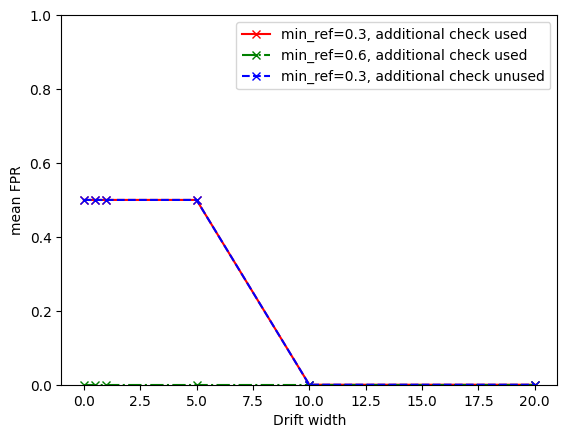

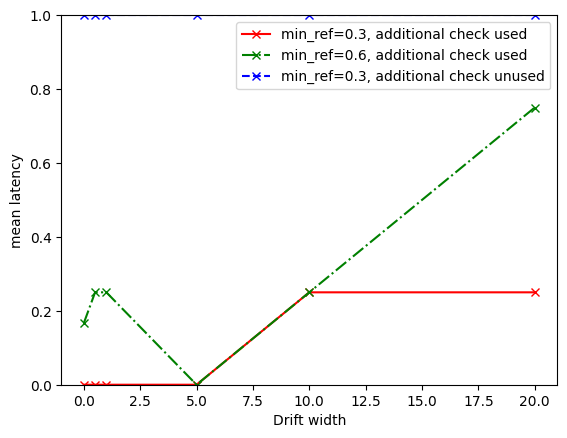

In [26]:
import pandas as pd
from matplotlib import pyplot as plt

common_path = 'results_after_analysis_jupyter'
filenames = [
    'sea_jupyter_results.csv',
    'sea_jupyter_results_majority.csv',
    'sea_jupyter_results_no_check.csv'
]
all_results = []
# all_results = pd.read_csv(common_path + '/' + filenames[0])

for filename in filenames:
    res = pd.read_csv(common_path + '/' + filename)
    all_results.append(res)

print(all_results)

labels = ['min_ref=0.3, additional check used', 'min_ref=0.6, additional check used',
          'min_ref=0.3, additional check unused']
linestyles = ['rx-', 'gx-.', 'bx--']

for i in range(3):
    plt.plot(all_results[i]['width'], all_results[i]['FPR_mean'], linestyles[i], label=labels[i])
plt.xlabel('Drift width')
plt.ylabel('mean FPR')
plt.legend()
plt.ylim((0, 1))

fig_fpr = plt.gcf()
plt.show()
fig_fpr.savefig('sea_fprs.png')

for i in range(3):
    plt.plot(all_results[i]['width'], all_results[i]['latency_mean'], linestyles[i], label=labels[i])
plt.xlabel('Drift width')
plt.ylabel('mean latency')
plt.legend()
plt.ylim((0, 1))

fig_latency = plt.gcf()
plt.show()
fig_latency.savefig('sea_latency.png')